# Transformer

오직 어텐션 메커니즘에만 기초하여 만들어진 네트워크 아키텍처  
RNN과 CNN은 철저히 배제했다.  
병렬화되어 유의미하게 적은 훈련 시간을 소요한다.  
이는 SOTA(State-Of-The-Art) 기계번역에 사용된다.

## 모델 구조

인코더:
- 입력 시퀀스 $(x_1,...,x_n)$을 $z=(z_1,...,z_n)$으로 사상한다.

디코더:
- $z$가 주어지면, 출력 시퀀스 $(y_1,...,y_m)$을 생성한다.
- 이것은 다음 것을 생성할 때 이전에 생성된 기호를 추가적인 입력으로 소비한다.
    - 이는 자기회귀(auto-regressive) 방법이다.

인코더와 디코더 모두에 적층된(stacked) 셀프 어텐션을 사용한다.  
인코더와 디코더 모두에 'point wise'한 FCNN을 사용한다.
- 여기서 point wise는 '각 시간마다'를 의미한다. 즉 모든 시간에 FCNN을 사용한다.

---

### **1. 전체 구조 요약**
- Transformer는 **N개의 인코더 블록** 과 **N개의 디코더 블록** 으로 구성됩니다.
- **인코더**는 입력 시퀀스를 처리하여 각 토큰에 대한 표현(은닉 상태)을 생성합니다.
- **디코더**는 인코더의 출력을 활용하여 타겟 시퀀스를 생성합니다.
- 주요 메커니즘:
  - **Multi-Head Attention**: 입력의 다양한 패턴에 집중하기 위해 여러 개의 Attention 메커니즘을 병렬로 사용.
  - **Add & Norm**: 각 레이어의 출력에 Skip Connection을 추가하고 정규화(Layer Normalization)를 수행.
  - **Feed Forward Network (FFN)**: 각 위치에서 독립적으로 선형 변환과 비선형 활성화를 적용.

---

### **2. 인코더 구조**
- 인코더는 **Multi-Head Attention** 과 **Feed Forward Network (FFN)** 의 반복 구조로 구성됩니다.

#### **a. Multi-Head Attention**
- **Self-Attention**을 수행하여 입력 시퀀스 내의 각 단어가 서로 어떤 관계에 있는지 학습합니다.
- $\text{Q, K, V}$ 모두 동일한 입력 시퀀스에서 생성됩니다.
- 각 Attention Head는 서로 다른 부분 패턴에 집중하며, 이를 통해 입력 간의 다양한 관계를 학습합니다.

#### **b. Add & Norm**
- Skip Connection을 통해 Attention의 출력을 원래 입력에 더하고, Layer Normalization을 적용합니다.
- 이는 그래디언트 소실 문제를 완화하고, 학습 안정성을 높이는 데 기여합니다.

#### **c. Feed Forward Network (FFN)**
- 각 단어의 은닉 상태에 대해 독립적으로 Fully Connected Network를 적용합니다.
- 활성화 함수로 보통 **ReLU** 가 사용되며, 비선형성을 추가합니다.

---

### **3. 디코더 구조**
디코더는 인코더와 비슷한 구조를 가지지만, 몇 가지 추가적인 메커니즘이 포함됩니다.

#### **a. Masked Multi-Head Attention**
- 디코더에서 이전에 생성된 단어만을 사용하여 현재 단어를 예측합니다.
- 이를 위해 **마스킹(Masking)** 을 적용하여 미래 시점의 정보를 차단합니다.
- Query는 디코더의 이전 타임스텝에서 생성된 출력이고, Key와 Value는 동일한 입력을 사용합니다.

#### **b. Multi-Head Attention (인코더-디코더 Attention)**
- 디코더는 **인코더의 출력** 과 상호작용하여 입력 문장의 정보에 집중합니다.
- Query는 디코더의 은닉 상태에서 생성되며, Key와 Value는 인코더의 출력에서 생성됩니다.
- 이를 통해 디코더는 입력 문장과 관련된 정보를 활용하여 타겟 문장을 생성합니다.

#### **c. Add & Norm 및 FFN**
- 각 Attention 출력에 Skip Connection을 추가하고, FFN을 통해 비선형 변환을 수행합니다.

---

### **4. 입력 및 출력 처리**
#### **a. Positional Encoding**
- Transformer는 순서를 처리하는 RNN과 달리, 입력에 순서 정보를 포함하지 않습니다.
- 이를 보완하기 위해 **위치 정보** 를 임베딩 벡터에 추가합니다.
- 보통 사인(sine) 및 코사인(cosine) 함수를 사용하여 위치 정보를 부호화합니다.

#### **b. Input Embedding**
- 입력 단어를 고정 길이의 벡터로 임베딩합니다.
- 이 벡터에 Positional Encoding이 추가되어 최종 입력으로 사용됩니다.

#### **c. Output Embedding**
- 디코더는 타겟 시퀀스를 입력으로 받아 단어를 임베딩한 벡터를 사용합니다.
- 출력 시퀀스는 **Shifted Right** 형태로 입력됩니다. 이는 디코더가 이전 단어를 기반으로 현재 단어를 생성할 수 있도록 합니다.

---

### **5. 어텐션 메커니즘의 핵심 역할**
#### **Self-Attention**
- 입력 시퀀스 내의 각 단어가 서로 어떻게 연관되어 있는지를 학습합니다.
- 예를 들어, 문장 "I saw a cat"에서 "cat"은 "saw"와 밀접한 관계를 가집니다.

#### **인코더-디코더 Attention**
- 디코더가 입력 문장과 상호작용하여 현재 예측 중인 단어와 관련된 입력의 특정 부분에 집중합니다.
- 예를 들어, "I saw a cat" → "나는 고양이를 보았다"를 번역할 때 "cat"과 "고양이"가 연결됩니다.

---

### **6. 기타 강조된 내용**
- **"decoder의 각 층은 encoder의 출력 중의 최종 층의 출력에 대해 attention을 한다."**
  - 디코더는 항상 인코더의 마지막 층 출력을 사용하여 입력 문장 전체와 상호작용합니다.
- **"encoder의 각 층은 encoder의 n-1층의 출력에 대해 attention을 한다."**
  - 인코더는 Self-Attention을 통해 이전 층의 출력을 기반으로 관계를 학습합니다.

---

### **7. Transformer의 장점**
- 병렬 처리에 적합하며, RNN이나 LSTM보다 학습 속도가 빠릅니다.
- Self-Attention 메커니즘을 통해 장거리 종속성을 효과적으로 학습할 수 있습니다.
- Skip Connection 및 Layer Normalization으로 안정적인 학습이 가능합니다.

---

### Scaled dot-product attention

compatibility(호환성)를 내적으로 구한다.

쿼리와 키의 내적을 행렬곱(행렬의 내적)으로 구하면 모든 시간대에 대해 동시에 호환성 값을 구할 수 있다.

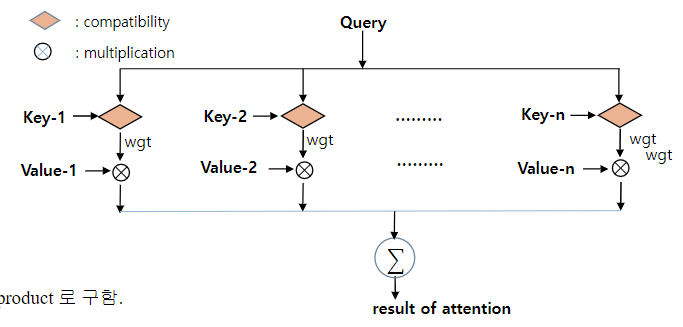

Query는 각 시간에서의 입력 (워드) 벡터이다.  
반면 Key, Value는 모든 시간에서의 입력 (워드) 벡터이다.

$$
Q_{n_q \times d_k} \cdot K^T_{d_k \times n_k} = QK^T_{n_q \times n_k}
$$
쿼리 벡터와 키 벡터의 내적 = 쿼리벡터를 모은 행렬과 키벡터를 모은 행렬의 행렬곱(행렬의 내적)

행별(Row-wise) 소프트맥스:
$$
\text{softmax}\left(\frac{QK^T_{i, n_k}}{\sqrt{d_k}}\right), \forall\ i=1,...,n_q
$$

여기서 $\sqrt{d_k}$는 키 벡터의 열 차원이자 쿼리 벡터의 열 차원으로, 값이 폭주하는 것을 막는다.


$$
\text{softmax}\left(\frac{QK^T_{n_q, n_k}}{\sqrt{d_k}}\right) \cdot V_{n_k \times d_v} 
$$
$$

=\text{Attention}(Q,K,V) = \left[\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V\right]_{n_q \times d_v}
$$

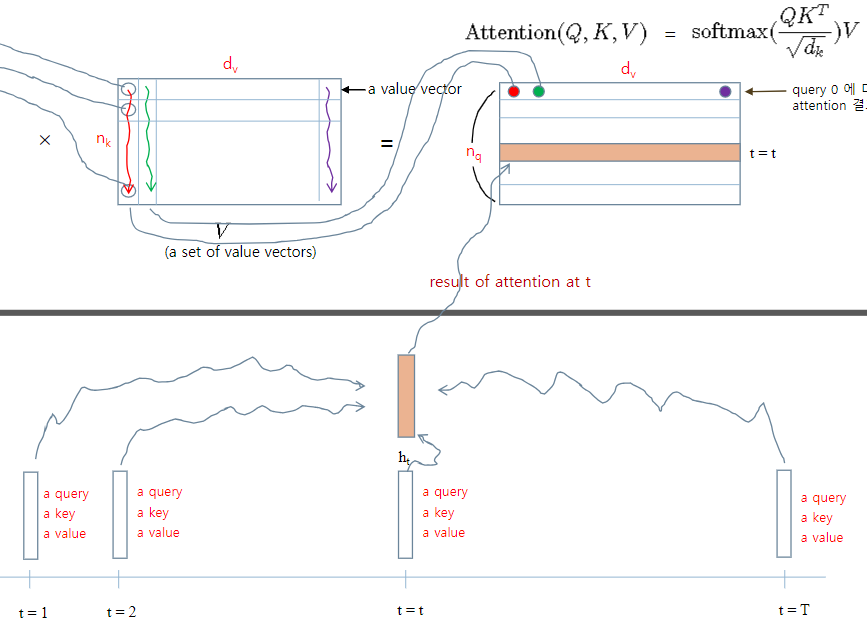

내적의 반복을 행렬곱으로 병렬 처리가 가능하게 만든 것.

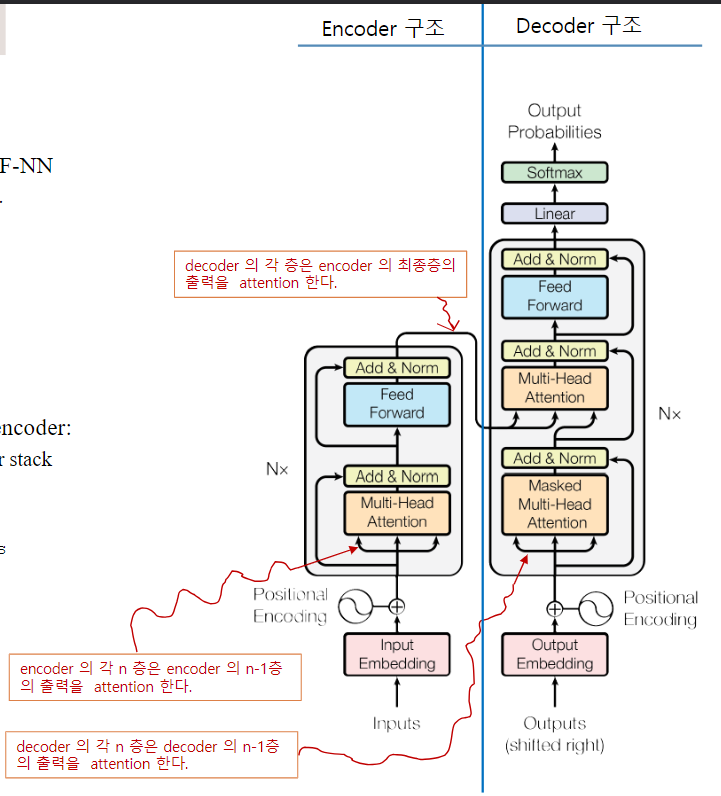

이것은 하나의 트랜스포머 레이어만 사용한 것으로, 이를 계속 쌓아서 12~16층의 모델을 만드는 것이 일반적이다. 이 때, 첫 번째 층에선 워드 벡터들을 그냥 받고, 다음 층에선 그 워드 벡터를 어텐션해 만들어진 벡터들을 받아 다시 어텐션한다.

어텐션 구조 외에도 잔차 연결(Residual Connection) 구조 또한 있다. 입력 (워드) 벡터를 어텐션한 출력 결과와 그 입력 벡터를 더한 뒤 정규화한다. 정규화 기법으론 표준정규분포를 따르게 하는 표준화가 많이 쓰인다.

## 트랜스포머 인코더의 레이어들

- $x_i^{(l)}$: output vector of layer $l$ at position $i$ (a row vector).
- $H$: size of output vectors.
- $X^l$: matrix whose $i$-th row is $x_i^{(l)}$.
- $X^0$: word embedding of all input.
- Compatibility matrix $D^{(l)}$:
  $$
  D^{(l)} = X^{(l-1)} (X^{(l-1)})^T \equiv Q K^T
  $$
  - 입력 워드 임베딩이 그대로 쿼리이자 키로 들어간다.

- $D^{(l)}_{i,k}$: compatibility between output of layer $l-1$ at time $i$ and that of layer $l-1$ at time $k$.
  - $i$행 $k$열의 $D$의 원소는 $l-1$ 번째 레이어에서 나온 $i$ 시점과 $k$ 시점의 출력의 연관도이다.
- $D^{(l)}$에 대해 Row-wise softmax computation을 하여:
  $$
  S^{(l)} = \text{softmax}(D^{(l)}) \quad \text{where} \quad S^{(l)}_{i,k} = \frac{\exp(D^{(l)}_{i,k})}{\sum_{j=0}^{T-1} \exp(D^{(l)}_{i,j})}
  $$
- Attention result (self-attention):
  $$
  A^{(l)} = S^{(l)} X^{(l-1)}
  $$
- 이를 기반으로 multi-head attention 기법으로 attention 결과를 얻는다 (다음 장 참고).
- Attention result at layer $l$ is fed to FFNN of layer $l$.
- The output of FFNN of a layer is the output of that layer: $x_i^{(l)}$.
- $x_i^{(l)}$ is fed to **sub-layer 1** of layer $(l+1)$ at all positions $i$.

### 멀티 헤드 어텐션

이전에 설명한 기본 어텐션에 기반한 내용이다.

기본 어텐션 연산 하나를 하나의 `어텐션 헤드`로 간주한다.

Computing $\text{head}_i$:
$$
Q = X^{(l-1)}W^Q_i
$$

$$
K = X^{(l-1)}W^k_i
$$

$$
V = X^{(l-1)}W^V_i
$$

여기서 $W^Q_i, W^K_i, W^V_i$는 파라미터 행렬이다.

선형변환된 행렬에 어텐션을 적용한 것이 헤드:

$$
\text{head}_i = \text{softmax}(QK^T)V
$$

$h$ 개의 헤드를 가진 멀티 헤드 어텐션의 경우, $l$번째 레이어의 어텐션 결과 $A^{(l)}$은 아래와 같이 얻어진다:

$$
A^{(l)}= concat(head_1, ...,head_h)W^O
$$

여기서:
$$
W^O \in \mathbb{R}^{h H\times H},\quad H = \dim(x^l_i),\ h = \#\text{ of heads}, 
$$
대문자 $H$는 출력 벡터의 크기(차원 수), 소문자 $h$는 어텐션 헤드의 개수이다.

이는 단순 접합$(concat)$된 멀티 헤드 어텐션의 결과를 선형변환으로 어텐션 결과로 사영하는 파라미터 행렬이다.

따라서 모델의 파라미터는:
- 모든 $W$(파라미터) 텐서들
- FCNN의 모든 파라미터들

### 디코더

- 유사하게, 디코더의 self-attention 레이어는 디코더의 각 위치가 해당 위치까지 (up to and including that position) 모든 위치에 주의를 기울일 수 있도록 허용합니다.

- 디코더에서 auto-regressive 속성을 유지하기 위해, 디코더에서 왼쪽으로의 정보 흐름을 방지해야 합니다.

- 이를 구현하기 위해, softmax 입력에서 불법 연결(시간 $t$ 계산 시에 그 이후의 시간에 대한 입력값)에 해당하는 모든 값을 masking 처리(값을 $-\infty$로 설정)하여 scaled dot-product attention 내부에서 수행합니다.

- 디코더에서 시간 $t+1$에 대한 처리가 완료되었다고 가정합니다. 다음 시간 $t$에 대한 작업은 다음과 같이 수행됩니다:
    - 시간 $t$의 맵 아래쪽 입력: $t-1$의 출력 단어의 word vector로 설정.
    - $t=0$ (즉, $t-1$) 입력은 원래의 word vector로 설정하며, $t+1$ 이후는 상관 없음.
    - 모든 시간에 대해 $t$와 $t$ 이전의 값만 계산 (주의: $t=0$부터 $t=t-1$까지 모두 계산).
    - 매 층의 self-attention에서 $QK^T$의 $t+1$ 열 이후의 모든 셀 값을 $-\infty$로 설정 (mask out).
    - 모든 시간마다 모든 레이어 계산을 수행.
    - 시간 $t$의 최종 층의 출력은 시간 $t$의 출력 단어가 결정되며, 이는 다음 시간의 맵 아래의 입력으로 사용됨.

---

디코더의 어텐션과 인코더의 어텐션은 **역할**과 **구조적 차이**에서 구체적으로 다릅니다. 이를 상세히 구분하면 다음과 같습니다:

---

**1. 인코더(Encoder)의 어텐션**

**구조**
- **Self-Attention**만 사용합니다.
- 입력 시퀀스(예: 문장)를 처리하면서 각 단어(혹은 토큰)가 다른 단어들과의 관계를 학습합니다.

**동작 방식**
1. **Query, Key, Value** 모두 동일한 입력 $X$에서 생성됩니다:
   $$
   Q = XW_Q, \quad K = XW_K, \quad V = XW_V
   $$
   여기서 $X$는 입력 시퀀스 전체입니다.
2. 각 토큰이 다른 모든 토큰과의 관계를 학습하며, 결과적으로 입력 시퀀스에 대한 **전체적인 표현(representation)**을 생성합니다.

**특징**
- **입력 시퀀스의 모든 위치를 참조 가능**:
  - 각 토큰이 다른 모든 입력 토큰과의 관계를 고려합니다.
  - 문맥 정보(context)를 학습하는 데 적합합니다.
- **마스킹 없음**:
  - 모든 입력 토큰 간의 관계를 학습하기 때문에 시간 순서에 제한이 없습니다.

**역할**
- 입력 시퀀스를 인코딩하여 각 단어를 문맥에 맞는 고차원 벡터로 변환합니다.
- 변환된 벡터는 디코더에서 사용됩니다.

---

**2. 디코더(Decoder)의 어텐션**

디코더는 **두 종류의 어텐션**을 사용합니다:
1. **Self-Attention (디코더 내부)**
2. **Encoder-Decoder Attention**

---

**2.1 디코더의 Self-Attention**
- **동작 방식**: 디코더의 Self-Attention은 인코더와 달리 **마스킹(masking)**을 적용합니다.
  - 마스킹은 **auto-regressive** 속성을 유지하기 위해 필요합니다. 이는 디코더가 **미래 정보(아직 생성되지 않은 단어들)**를 참조하지 못하도록 제한하는 역할을 합니다.
- **구조**:
  $$
  \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}} + M\right)V
  $$
  여기서 $M$은 **마스크 행렬**로, 미래 단어의 관계를 $-\infty$로 설정해 softmax 확률이 0이 되도록 합니다.

- **특징**:
  - $t$번째 토큰이 $t-1$까지의 정보만 사용하도록 제한합니다.
  - 디코더가 이전에 생성한 단어의 문맥만 참조하며, 새 단어를 생성합니다.

---

**2.2 Encoder-Decoder Attention**
- 디코더의 두 번째 어텐션 레이어로, **인코더의 출력**을 참조합니다.
- **동작 방식**:
  - Query는 디코더에서 생성되고, Key와 Value는 인코더의 출력에서 가져옵니다:
    $$
    Q = X^{\text{decoder}}W_Q, \quad K = X^{\text{encoder}}W_K, \quad V = X^{\text{encoder}}W_V
    $$
  - 디코더의 Query가 인코더의 Key와 Value와 결합하여 입력 시퀀스와 생성 중인 시퀀스 간의 관계를 학습합니다.

- **특징**:
  - 디코더의 각 위치가 입력 시퀀스 전체를 참조할 수 있습니다.
  - 인코더가 생성한 문맥 정보(context)를 활용하여 디코더의 출력 단어를 생성합니다.

- **역할**:
  - 입력 시퀀스(인코더의 출력)와 현재 디코더 상태를 결합하여, 입력 시퀀스에 따라 출력 단어를 생성하는 데 도움을 줍니다.

---

**인코더와 디코더의 어텐션 차이**

| **구분**                 | **인코더의 Self-Attention**                              | **디코더의 Self-Attention**                     | **Encoder-Decoder Attention**               |
|--------------------------|-------------------------------------------------------|-----------------------------------------------|---------------------------------------------|
| **Query, Key, Value**    | 모두 입력 시퀀스에서 생성 ($X$)                           | 디코더 출력에서 생성 ($X^\text{decoder}$)       | Query는 디코더에서, Key/Value는 인코더에서 생성 |
| **마스킹**               | 없음                                                  | 미래 정보를 참조하지 않도록 마스킹 적용         | 없음                                         |
| **참조 범위**            | 입력 시퀀스의 모든 단어                                  | 이전 타임스텝까지의 디코더 출력만 참조           | 입력 시퀀스 전체 참조                        |
| **역할**                 | 입력 시퀀스를 문맥에 맞게 인코딩                         | 디코더가 이전 출력의 문맥 정보를 학습           | 입력과 출력 간의 관계 학습                   |

---


- **인코더의 어텐션**: 입력 시퀀스 전체의 관계를 학습하며 문맥을 인코딩.
- **디코더의 Self-Attention**: 생성 중인 출력 시퀀스의 이전 상태만 참조.
- **Encoder-Decoder Attention**: 입력과 출력 간의 관계를 학습하여 입력 시퀀스를 기반으로 출력 단어를 생성.


# BERT

_Bidirectional Encoder Representations from Transformers_


---

- **새로운 언어 표현 모델**
  - 모든 층에서 왼쪽 및 오른쪽 문맥을 공동으로 조건화하여 라벨이 없는 텍스트로부터 양방향 표현을 사전 학습(pretrain)할 수 있도록 합니다.

- **사전 학습된 BERT 모델은 하나의 추가 출력 층만으로도 미세 조정(finetune)이 가능**
  - 다양한 작업에서 최첨단 모델을 생성할 수 있습니다.
  - 작업별로 특화된 아키텍처 수정 없이 수행됩니다.

- **BERT는 개념적으로 단순하고 실질적으로 강력한 성능을 발휘합니다.**

- **두 단계** 로 구성:
  1. **사전 학습 (pre-training)**  
     - 모델은 다양한 사전 학습 과제를 통해 라벨이 없는 데이터로 학습됩니다.
  2. **미세 조정 (fine-tuning)**  
     - 모델은 사전 학습된 BERT 파라미터로 초기화됩니다.
     - 모든 파라미터는 하위 작업의 라벨이 있는 데이터를 사용하여 미세 조정됩니다.

---



- **BERT의 전체 사전 학습(pre-training) 및 미세 조정(fine-tuning) 절차**
  
- 출력 층(output layers)을 제외하고, 사전 학습과 미세 조정에서 동일한 아키텍처를 사용합니다.

- 동일한 사전 학습된 모델 파라미터가 다양한 하위 작업(downstream tasks)의 모델 초기화에 사용됩니다.

- 미세 조정 동안, 모든 파라미터가 미세 조정됩니다.

- `[CLS]`는 각 입력 예제의 앞에 추가되는 특수 기호이며, `[SEP]`는 질문/답변 구분과 같은 역할을 하는 특수 구분 토큰입니다.

---


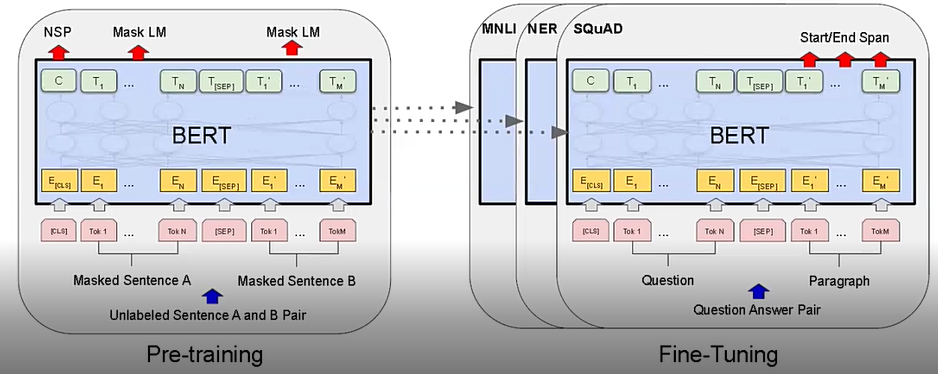

## 아키텍처

- **다층 양방향 트랜스포머 인코더**  
- **L**: 레이어 수(즉, 트랜스포머 블록 수)를 나타냄  
- **H**: 히든 사이즈  
- **A**: Self-Attention 헤드 수  

---

**BERT-BASE**:
- **L** = 12  
- **H** = 768  
- **A** = 12  
- 총 파라미터 수 = **110M**  

---

**BERT-LARGE**:
- **L** = 24  
- **H** = 1024  
- **A** = 16  
- 총 파라미터 수 = **340M**  

---


## 입력/출력 표현 
_Input/Output Representations_

- 입력은 **한 문장** 또는 **두 문장**을 수용할 수 있습니다.  
- 문장의 의미는 **하나의 언어적 문장**이 아니라 **임의의 텍스트 범위**를 의미합니다.  
- 입력은 **토큰 시퀀스** 형태로 제공됩니다.  

**WordPiece 임베딩 사용**:
- 약 30,000개의 토큰을 포함합니다.  

**첫 번째 토큰은 항상 특별 토큰 “[CLS]”여야 합니다**:
- 이 토큰에 해당하는 최종 히든 상태는 **분류 작업을 위한 시퀀스 표현**으로 사용됩니다.  

**입력 시퀀스는 두 문장으로 구성됩니다**:
- 두 문장은 특별 토큰 “[SEP]”으로 구분됩니다.  

**임베딩의 구성 요소**:
- **E**: 입력 임베딩  
  - 각 시간 단위마다 입력 임베딩은 **토큰 임베딩, 세그먼트 임베딩, 위치 임베딩**의 합으로 계산됩니다.  
- **C**: [CLS] 토큰의 최종 히든 벡터 (시간 t=1에서).  
- **Tᵢ**: i번째 입력 토큰의 최종 히든 벡터.  

---


### 입력 표현
BERT Input Representation

- **입력 임베딩**은 다음의 합으로 구성됩니다:
  - **토큰 임베딩(Token Embeddings)**  
  - **세그먼트 임베딩(Segment Embeddings)**  
  - **위치 임베딩(Position Embeddings)**  

---

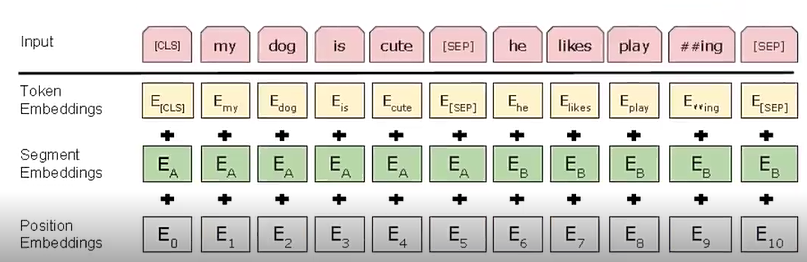


1. **Input**: 입력 시퀀스는 특별 토큰 `[CLS]`로 시작하며, 텍스트와 특별 토큰 `[SEP]`으로 나뉘어 구성됩니다.
   - 예: `[CLS] my dog is cute [SEP] he likes play ##ing [SEP]`

2. **Token Embeddings (단어 임베딩)**:
   - 각 입력 단어 또는 부분 단어를 벡터로 변환.
   - 예: `E_[CLS]`, `E_my`, `E_dog` 등.

3. **Segment Embeddings (세그먼트 임베딩)**:
   - 입력 시퀀스가 두 문장으로 구성될 경우, 각 문장에 대해 다른 세그먼트 벡터를 추가.
   - 예: 첫 문장에는 `E_A`를, 두 번째 문장에는 `E_B`를 사용.

4. **Position Embeddings (위치 임베딩)**:
   - 각 토큰의 순서를 고려하기 위해 위치 정보를 벡터로 추가.
   - 예: `E_0`, `E_1`, `E_2` 등.

5. **최종 입력 임베딩**:
   - 세 가지 임베딩을 모두 더한 값으로 최종 입력 벡터를 구성.

---


**예시**
- `[CLS] my dog is cute [SEP]`의 입력 벡터:
  - $ E_{[CLS]} + E_A + E_0, E_{my} + E_A + E_1, \dots $
- `[SEP] he likes play ##ing [SEP]`의 입력 벡터:
  - $ E_{[SEP]} + E_B + E_5, E_{he} + E_B + E_6, \dots $

위 과정은 BERT 모델이 문맥 정보와 위치 정보를 통합하여 학습하는 데 중요한 역할을 한다.

## Masked LM (BERT의 사전 학습)

- **이 과정은 비지도 방식으로 수행됩니다**:
  - 이는 라벨이 없는 데이터를 사용하기 때문입니다.

---

- **MLM 작업 (Masked Language Modeling, Cloze 작업)**:
  - 입력 토큰의 일부 비율을 랜덤하게 마스킹(masked)합니다.
  - 그런 다음, 마스킹된 토큰을 예측합니다.
  - 이는 언어 모델 학습 과제와 유사합니다.

---

- **각 입력 시퀀스에서 15%의 WordPiece 토큰이 마스킹됩니다**:
  - 이 작업은 양방향 사전 학습 모델을 얻는 데 도움을 줍니다.

---

- **단점**:  
  - `[MASK]` 토큰은 미세 조정(fine-tuning) 시 나타나지 않습니다.  
  - 따라서 사전 학습과 미세 조정 사이에 불일치가 발생합니다.

---

- **이 단점을 완화하기 위한 전략**:
  - 토큰의 15%를 다음 중 하나로 랜덤하게 선택하여 마스킹합니다.  
  - 예: i번째 토큰이 선택된 경우, 다음의 확률로 처리됩니다:
    1. 80%의 확률로 `[MASK]`로 교체.
    2. 10%의 확률로 랜덤한 다른 토큰으로 교체.
    3. 10%의 확률로 변경하지 않음.
  - 이후, 해당 위치의 출력 벡터 $ T_i $를 사용해 원래 토큰(타겟 토큰)을 교차 엔트로피 손실로 예측합니다.

---

## **BERT 미세 조정(Fine-tuning BERT)**

---

- **두 개의 텍스트 쌍을 포함하는 작업에서**, BERT는 **셀프 어텐션 메커니즘**을 사용하여 **결합된 텍스트 쌍을 인코딩**합니다:
  - 두 문장 간의 **양방향 크로스 어텐션**이 포함됩니다.

---

- **BERT 입력에 작업별 입력이 추가로 연결됩니다**:
  - **Paraphrasing (의역)**: A has same meaning of B.  
  - **Entailment (가정-전제 관계)**: If A is True, then B also.  
  - **Question-answer (질문-답변 관계)**: Question: A?, Answer: B.  
  - **Text classification (텍스트 분류)**: A를 입력받고 B는 그냥 빈 상태로 추가 층을 연결해 확률 출력.

---

- **BERT 출력에서**:
  1. **토큰 수준 작업 (Token-level tasks)**:
     - 토큰 표현이 BERT 상단의 출력 층으로 전달됨.
     - 예: **시퀀스 태깅**, **질문-답변**.
  
  2. **텍스트 수준 분류 (Text-level classification)**:
     - `[CLS]` 토큰의 표현이 출력 층으로 전달됨.
     - 예: **Entailment**, **감성 분석** 작업.

---

__예: 주어 찾기 문제를 위한 미세 조정__

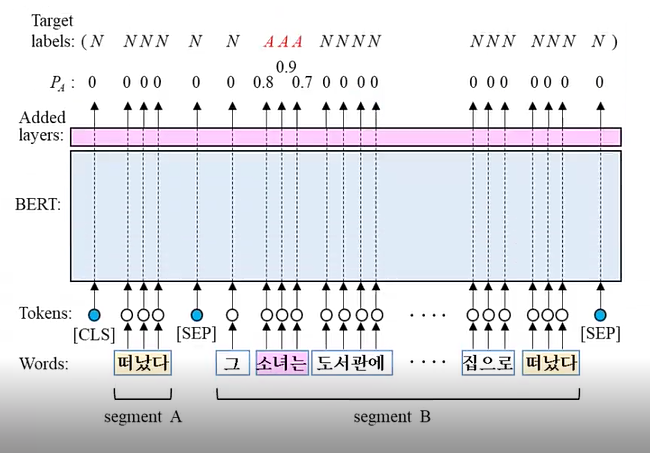

B 부분에 문장을 넣는다. 그리고 A 에는 용언을 넣어서 그것에 대응되는 주어를 모델이 예측하게 만든다.